### Data Load

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.exceptions import ConvergenceWarning


# Carregar o dataset
df = pd.read_csv("../data/rent.csv")

# Separar features (X) e target (y)
X = df.drop("price", axis=1) 
y = df["price"]

### 5)

/home/pedro/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/tmp/ipykernel_2399/516653073.py:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


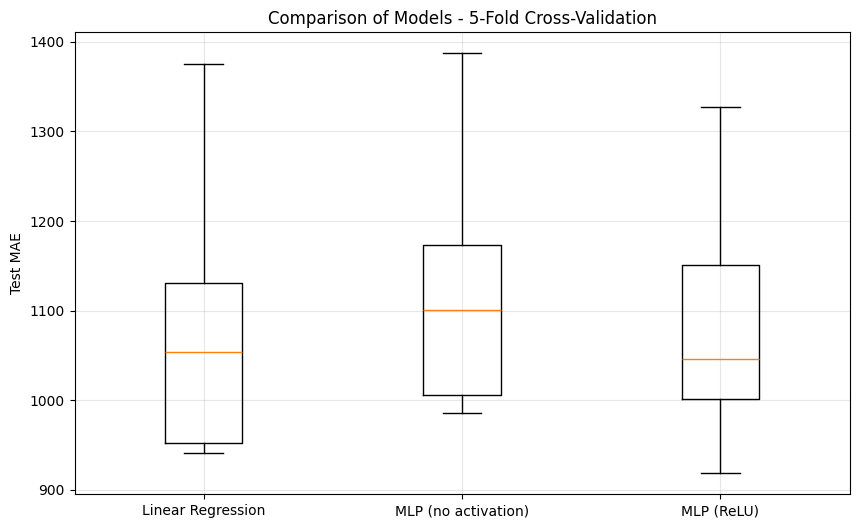

Mean Test MAE:
Linear Regression: 1090.64 +- 158.47
MLP (no activation): 1130.35 +- 145.14
MLP (ReLU): 1088.79 +- 141.10


In [ ]:
warnings.filterwarnings(action="ignore", category=ConvergenceWarning)

# Modelo 1: Regressão Linear
model1 = LinearRegression()

# Modelo 2: MLP sem funções de ativação
model2 = MLPRegressor(
    hidden_layer_sizes=(5, 5),  
    activation="identity",  
    max_iter=1000,
    random_state=42,
)

# Modelo 3: MLP com ReLU
model3 = MLPRegressor(
    hidden_layer_sizes=(5, 5),  
    activation="relu",  
    max_iter=1000,
    random_state=42,
)


# Definir o scorer para MAE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Fazer cross-validation para cada modelo
cv_results1 = cross_validate(
    model1, X, y, cv=5, scoring=mae_scorer, return_train_score=True
)

cv_results2 = cross_validate(
    model2, X, y, cv=5, scoring=mae_scorer, return_train_score=True
)

cv_results3 = cross_validate(
    model3, X, y, cv=5, scoring=mae_scorer, return_train_score=True
)

# Extrair os MAE (converter para positivo)
mae1 = -cv_results1["test_score"]
mae2 = -cv_results2["test_score"]
mae3 = -cv_results3["test_score"]

# Preparar os dados para o boxplot
data = [mae1, mae2, mae3]
labels = ["Linear Regression", "MLP (no activation)", "MLP (ReLU)"]

# Criar o boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels)
plt.ylabel("Test MAE")
plt.title("Comparison of Models - 5-Fold Cross-Validation")
plt.grid(True, alpha=0.3)
plt.show()

print("Mean Test MAE:")
print(f"Linear Regression: {mae1.mean():.2f} +- {mae1.std():.2f}")
print(f"MLP (no activation): {mae2.mean():.2f} +- {mae2.std():.2f}")
print(f"MLP (ReLU): {mae3.mean():.2f} +- {mae3.std():.2f}")

### 6)

The Linear Regression model achieved a mean test MAE of 1090.64 ± 158.47, while the MLP with ReLU activation performed similarly with 1088.79 ± 141.10. The MLP without activation functions had worse performance, with a mean MAE of 1130.35 ± 145.14.

These results make sense when we consider how neural networks work. An MLP without activation functions is basically just a linear model, no matter how many layers we add. This happens because when we stack linear transformations on top of each other, the result is still linear. So this model can't learn nonlinear patterns in the data, which limits what it can do. The slightly worse performance compared to Linear Regression is probably because it has more parameters to optimize during training, which makes it harder to converge properly, without giving any real advantage.

The MLP with ReLU activation is different because it adds nonlinearity to the model. This means it can learn more complex relationships between the features and the rent prices. However, in our case, the improvement over Linear Regression is quite small, which suggests that the relationship in this dataset is mostly linear anyway. Still, the MLP with ReLU shows slightly lower variability across the different folds (±141.10 vs ±158.47), which indicates it generalizes a bit better.

### 7)

Split: 1
Split: 2
Split: 3
Split: 4
Split: 5
[3829.74491417 3828.2148006  3825.70221803 3821.83614205 3816.30985186
 3808.88477956 3799.29073118 3787.26428039 3772.54289154 3754.92025429
 3734.17180859 3710.00389746 3682.16889369 3650.42480936 3614.53100071
 3574.25152809 3529.37246321 3479.68071119 3424.96459171 3365.01745512
 3299.62128193 3228.609615   3151.81908315 3069.12880882 2980.50441515
 2885.99976747 2785.72253831 2680.19066727 2570.25053143 2456.93426789
 2341.81539877 2227.52113717 2116.80165655 2013.15920598 1919.74594334
 1836.59017498 1762.7696608  1697.02866263 1638.20345068 1584.36664849
 1532.38154146 1485.76058073 1443.50089734 1405.20526764 1370.12031938
 1338.15134781 1309.47731665 1284.00486473 1261.00594798 1240.49827376
 1222.10517057 1205.29879252 1190.14359702 1176.46288344 1164.31169317
 1153.61400797 1144.27158183 1136.07889072 1128.8822909  1122.65703257
 1117.14473195 1112.31954508 1107.99908196 1104.25415363 1100.86926165
 1097.88304926 1095.20264203 109

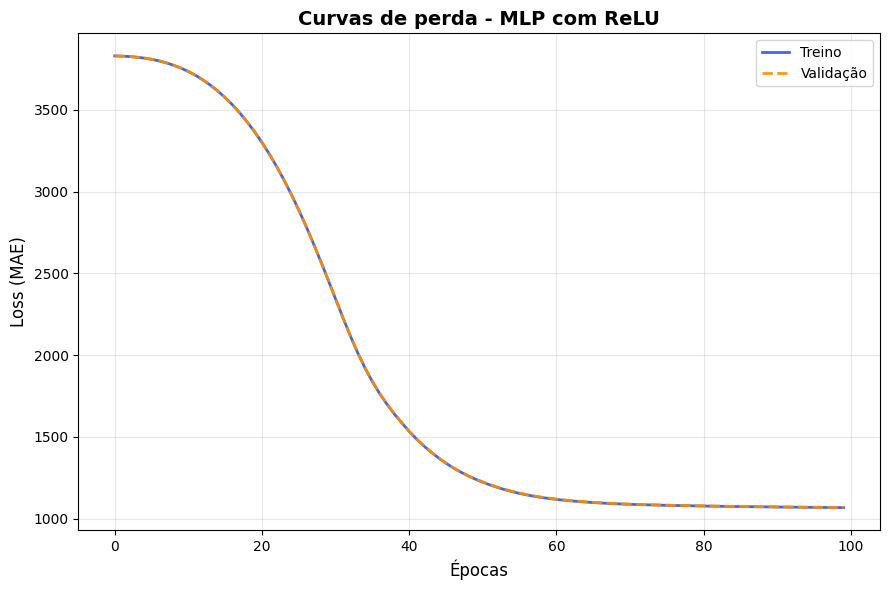

In [10]:
warnings.filterwarnings(action="ignore", category=ConvergenceWarning)

kf = KFold(n_splits=5, shuffle=True, random_state=0)
n_epochs = 100

train_losses = []
val_losses = []

i = 1

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]


    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    train_loss_fold = []
    val_loss_fold = []

    mlp_fold = MLPRegressor(
        hidden_layer_sizes=(5, 5),
        activation="relu",
        max_iter=1,
        warm_start=True,
        random_state=0
    )

    print("Split:", i)
    i -=- 1

    for epoch in range(n_epochs):
        mlp_fold.fit(X_train, y_train)

        y_train_pred = mlp_fold.predict(X_train)
        y_val_pred = mlp_fold.predict(X_val)

        train_loss_fold.append(mean_absolute_error(y_train, y_train_pred))
        val_loss_fold.append(mean_absolute_error(y_val, y_val_pred))

    train_losses.append(train_loss_fold)
    val_losses.append(val_loss_fold)


# --- 5. Média entre folds ---
train_loss_mean = np.mean(train_losses, axis=0)
val_loss_mean = np.mean(val_losses, axis=0)

print(train_loss_mean)
print(val_loss_mean)

# --- 6. Plot (versão melhorada) ---
plt.figure(figsize=(9, 6))

plt.plot(train_loss_mean, label="Treino", color="royalblue", linewidth=2)
plt.plot(
    val_loss_mean,
    label="Validação",
    color="darkorange",
    linestyle="--",
    linewidth=2,
    alpha=0.9,
)

plt.xlabel("Épocas", fontsize=12)
plt.ylabel("Loss (MAE)", fontsize=12)
plt.title("Curvas de perda - MLP com ReLU", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()